In [1]:
import geopy

import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

from geopandas import GeoDataFrame
from shapely.geometry import Point
from geopy.geocoders import Nominatim
from adjustText import adjust_text
from geopy.extra.rate_limiter import RateLimiter


Data loaded..
Locations calculated..
GeoDataFrame created..


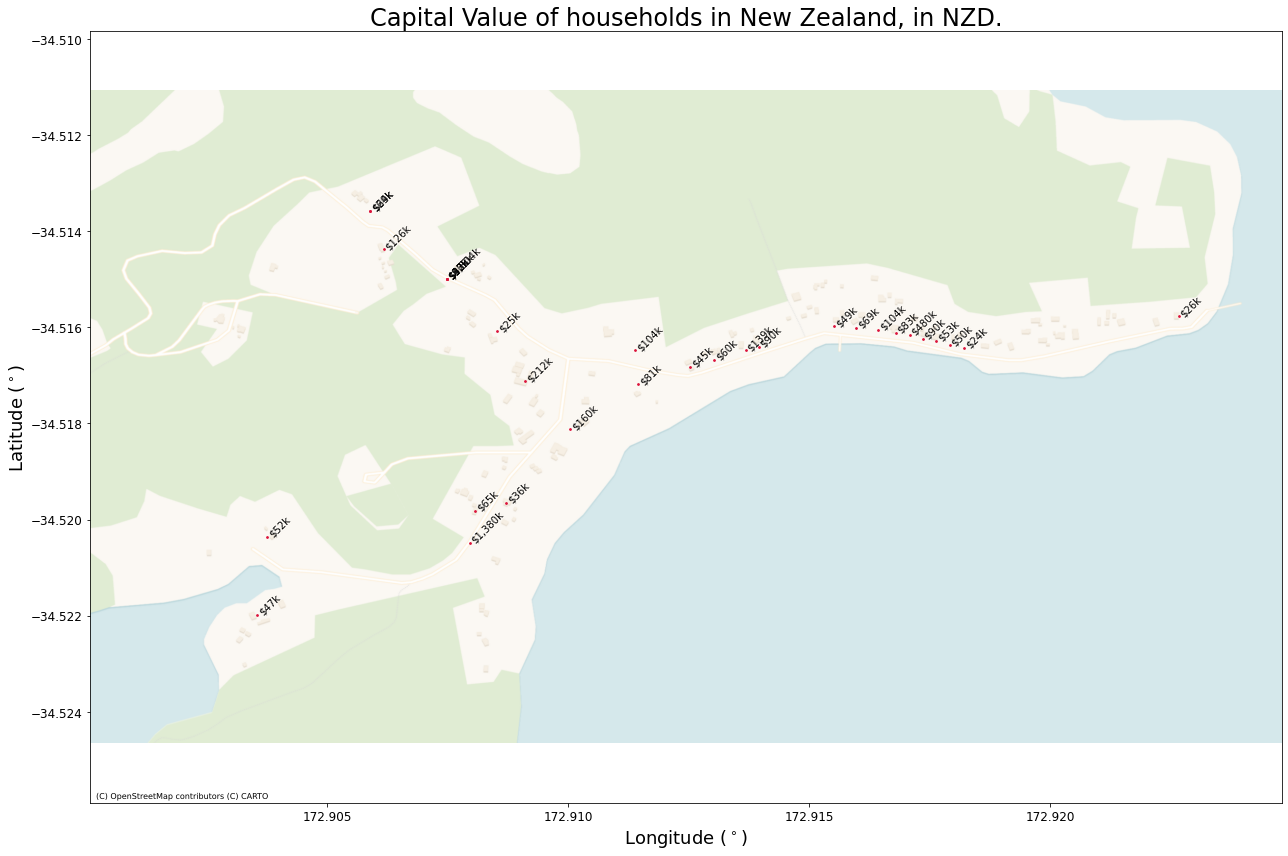

In [2]:
house_data = r'/home/shaun/Documents/work_dir/LINZ/qv_housing_data/qv_housing_0.csv'
data = pd.read_csv(house_data)
print('Data loaded..')

email = 'shaunlowis@gmail.com'
locator = Nominatim(user_agent=email)

df = pd.DataFrame()

geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

df['location'] = data['address'].loc[data['address'].str.contains('Te Hapua')].apply(geocode)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
print('Locations calculated..')

df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)

drop_labels = ['location', 'altitude', 'latitude', 'longitude', 'point']

geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]

df = df.drop(drop_labels, axis=1)
df['value'] = data['capital_value'].loc[data['address'].str.contains('Te Hapua')].str.replace(",000", "k")

gdf = GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)
print('GeoDataFrame created..')

# gdf.to_file(r'/home/shaun/Documents/work_dir/climate_sigma/shape/test.shp')

fig, ax = plt.subplots(figsize=(18, 12))
gdf.plot(ax=ax, markersize=3, color='crimson')
ax = plt.gca()

for i, text in enumerate(gdf['value']):
    ax.annotate(text, (gdf['geometry'].iloc[i].x, gdf['geometry'].iloc[i].y), rotation=45)

ctx.add_basemap(ax=ax, crs='EPSG:4326', source=ctx.providers.CartoDB.VoyagerNoLabels)
plt.axis('equal')
plt.title('Capital Value of households in New Zealand, in NZD.', fontsize=24)
plt.xlabel(r'Longitude ($^\circ$)', fontsize=18)
plt.ylabel(r'Latitude ($^\circ$)', fontsize=18)
ax.ticklabel_format(useOffset=False, style='plain')
ax.tick_params(axis='both', labelsize=12)
plt.tight_layout()
# plt.show()
savedir = r'/home/shaun/Desktop/CV_NZ_new.jpeg'
plt.savefig(savedir, dpi=300)

In [28]:
house_data = r'/home/shaun/Documents/work_dir/LINZ/qv_housing_data/qv_housing_0.csv'
data = pd.read_csv(house_data)
print('Data loaded..')

data.loc[data['address'].str.contains('Northland')]



Data loaded..


,address,capital_value,land_value,last_valued,improvement_value,valuation_reference,legal_description
0,"0 Spirits Bay Road, Spirits Bay","$165,000","$165,000",01 Aug 2019,$0,11 / 6200 C,\n ...
1,"1247 Te Hapua Road, Te Hapua","$26,000","$9,500",01 Aug 2019,"$16,500",11 / 1200,\n ...
2,"1193 Te Hapua Road, Northland","$480,000","$43,000",01 Aug 2019,"$437,000",11 / 1400,\n ...
3,"0 Te Hapua Road, Northland","$90,000","$21,000",01 Aug 2019,"$69,000",11 / 5600,\n ...
4,"1205 Te Hapua Road, Te Hapua","$24,000","$24,000",01 Aug 2019,$0,11 / 1600,\n ...
...,...,...,...,...,...,...,...
912,6 Gardner Place,"$450,000","$170,000",01 Jul 2017,"$280,000",8440 / 14416,\n ...
913,5A Gardner Place,"$221,000","$76,000",01 Jul 2017,"$145,000",8440 / 14417 A,\n ...
914,5B Gardner Place,"$216,000","$76,000",01 Jul 2017,"$140,000",8440 / 14417 B,\n ...
915,4A Gardner Place,"$347,000","$160,000",01 Jul 2017,"$187,000",8440 / 14418,\n ...


In [31]:
house_data = r'/home/shaun/Documents/work_dir/LINZ/qv_housing_data/qv_housing_0.csv'
data = pd.read_csv(house_data)
pd.set_option("display.max_rows", None, "display.max_columns", None)
data

,address,capital_value,land_value,last_valued,improvement_value,valuation_reference,legal_description
0,"0 Spirits Bay Road, Spirits Bay","$165,000","$165,000",01 Aug 2019,$0,11 / 6200 C,\n ...
1,"1247 Te Hapua Road, Te Hapua","$26,000","$9,500",01 Aug 2019,"$16,500",11 / 1200,\n ...
2,"1193 Te Hapua Road, Northland","$480,000","$43,000",01 Aug 2019,"$437,000",11 / 1400,\n ...
3,"0 Te Hapua Road, Northland","$90,000","$21,000",01 Aug 2019,"$69,000",11 / 5600,\n ...
4,"1205 Te Hapua Road, Te Hapua","$24,000","$24,000",01 Aug 2019,$0,11 / 1600,\n ...
5,"1201 Te Hapua Road, Te Hapua","$50,000","$25,000",01 Aug 2019,"$25,000",11 / 1700,\n ...
6,"1197 Te Hapua Road, Te Hapua","$53,000","$25,000",01 Aug 2019,"$28,000",11 / 1800,\n ...
7,"1195 Te Hapua Road, Te Hapua","$90,000","$22,000",01 Aug 2019,"$68,000",11 / 1900,\n ...
8,"1191 Te Hapua Road, Te Hapua","$83,000","$22,000",01 Aug 2019,"$61,000",11 / 2100,\n ...
9,"1187 Te Hapua Road, Te Hapua","$104,000","$22,000",01 Aug 2019,"$82,000",11 / 2300,\n ...
